In [64]:
!pip install pyspark

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [67]:
df = spark.read.csv("/content/drive/MyDrive/stroke_data.csv", header=True, inferSchema=True)
df.show(15)

+------+----+--------+------------+------+-------------+---------------+-----+
|gender| age|diabetes|hypertension|stroke|heart disease|smoking history|  BMI|
+------+----+--------+------------+------+-------------+---------------+-----+
|Female|80.0|       0|           0|     0|            1|          never|25.19|
|Female|54.0|       0|           0|     0|            0|           null| null|
|  Male|28.0|       0|           0|     0|            0|          never| null|
|Female|36.0|       0|           0|     0|            0|        current|23.45|
|  Male|76.0|       0|           1|     0|            1|        current|20.14|
|Female|20.0|       0|           0|     0|            0|          never| null|
|Female|44.0|       1|           0|     0|            0|          never|19.31|
|Female|79.0|       0|           0|     0|            0|           null|23.86|
|  Male|42.0|       0|           0|     0|            0|          never|33.64|
|Female|32.0|       0|           0|     0|          

In [68]:
#to show the data type of each column
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- heart disease: integer (nullable = true)
 |-- smoking history: string (nullable = true)
 |-- BMI: double (nullable = true)



In [69]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, GBTClassifier
from pyspark.ml.feature import  VectorAssembler, StringIndexer, VectorIndexer
from pyspark.sql.functions import * 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.ml import Pipeline
#from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN,  SMOTETomek
from pyspark.ml.linalg import Vectors
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection, NeighbourhoodCleaningRule
from pyspark.mllib.tree import GradientBoostedTrees
import warnings
warnings.filterwarnings('ignore')


In [70]:
spark = SparkSession.builder.appName('strroke').getOrCreate()

In [71]:
df.groupBy(df['stroke']).count().show()
#1 represent the stroke
#0 represent the non-stroke

+------+-----+
|stroke|count|
+------+-----+
|     1| 1426|
|     0|98574|
+------+-----+



In [72]:
df_pd = df.toPandas()

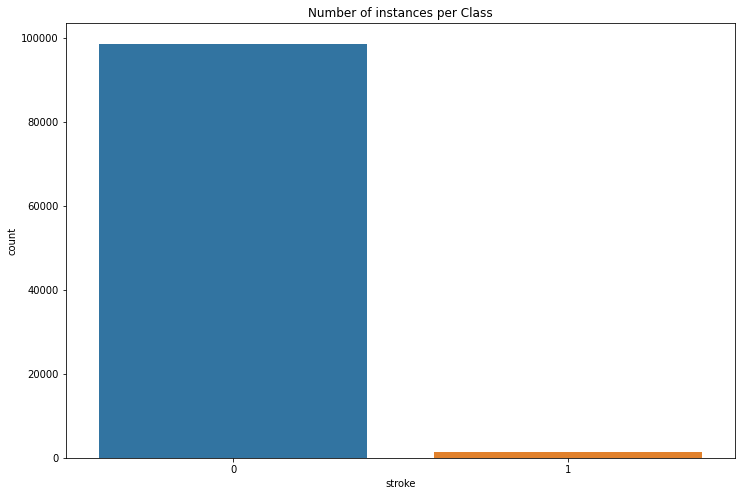

In [73]:
#plot class distribution
plt.title("Number of instances per Class")
sns.countplot(df_pd.stroke);
plt.show()



In [74]:
#to check the null values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------+---+--------+------------+------+-------------+---------------+-----+
|gender|age|diabetes|hypertension|stroke|heart disease|smoking history|  BMI|
+------+---+--------+------------+------+-------------+---------------+-----+
|     0|  0|       0|           0|     0|            0|          35816|25444|
+------+---+--------+------------+------+-------------+---------------+-----+



In [75]:
# impute BMI null records using BMI Distribution by Age Calculator for the United States
#reference: https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/

df_2 = df_pd[(df_pd['age']>=2) & (df_pd['age']<=3)]
value = {'BMI': 16.5}
df_2 = df_2.fillna(value = value)

df_4 = df_pd[(df_pd['age']>=4) & (df_pd['age']<=5)]
value = {'BMI': 16.5}
df_4 = df_4.fillna(value = value)

df_6 = df_pd[(df_pd['age']>=6) & (df_pd['age']<=7)]
value = {'BMI': 17.2}
df_6 = df_6.fillna(value = value)

df_8 = df_pd[(df_pd['age']>=8) & (df_pd['age']<=9)]
value = {'BMI': 18.3}
df_8 = df_8.fillna(value = value)

df_10 = df_pd[(df_pd['age']>=10) & (df_pd['age']<=11)]
value = {'BMI': 20.2}
df_10 = df_10.fillna(value = value)

df_12 = df_pd[(df_pd['age']>=12) & (df_pd['age']<=13)]
value = {'BMI': 22.0}
df_12 = df_12.fillna(value = value)

df_14 = df_pd[(df_pd['age']>=14) & (df_pd['age']<=15)]
value = {'BMI': 23.4}
df_14 = df_14.fillna(value = value)

df_16 = df_pd[(df_pd['age']>=16) & (df_pd['age']<=17)]
value = {'BMI': 25.3}
df_16 = df_16.fillna(value = value)

df_18 = df_pd[(df_pd['age']>=18) & (df_pd['age']<=24)]
value = {'BMI': 27.1}
df_18 = df_18.fillna(value = value)

df_25 = df_pd[(df_pd['age']>=25) & (df_pd['age']<=29)]
value = {'BMI': 27.9}
df_25 = df_25.fillna(value = value)

df_30 = df_pd[(df_pd['age']>=30) & (df_pd['age']<=34)]
value = {'BMI': 29.6}
df_30 = df_30.fillna(value = value)

df_35 = df_pd[(df_pd['age']>=35) & (df_pd['age']<=39)]
value = {'BMI': 30.2}
df_35 = df_35.fillna(value = value)

df_40 = df_pd[(df_pd['age']>=40) & (df_pd['age']<=44)]
value = {'BMI': 30.1}
df_40 = df_40.fillna(value = value)

df_45 = df_pd[(df_pd['age']>=45) & (df_pd['age']<=49)]
value = {'BMI': 29.7}
df_45 = df_45.fillna(value = value)

df_50 = df_pd[(df_pd['age']>=50) & (df_pd['age']<=54)]
value = {'BMI': 30.1}
df_50 = df_50.fillna(value = value)

df_55 = df_pd[(df_pd['age']>=55) & (df_pd['age']<=59)]
value = {'BMI': 29.8}
df_55 = df_55.fillna(value = value)

df_60 = df_pd[(df_pd['age']>=60) & (df_pd['age']<=64)]
value = {'BMI': 30.5}
df_60 = df_60.fillna(value = value)

df_65 = df_pd[(df_pd['age']>=65) & (df_pd['age']<=69)]
value = {'BMI': 30.0}
df_65 = df_65.fillna(value = value)

df_70 = df_pd[(df_pd['age']>=70) & (df_pd['age']<=74)]
value = {'BMI': 29.8}
df_70 = df_70.fillna(value = value)

df_75 = df_pd[(df_pd['age']>=75)]
value = {'BMI': 28.1}
df_75 = df_75.fillna(value = value)


all_frames = [df_2, df_4, df_6, df_8, df_10, df_12, df_14, df_16, df_18, df_25, df_30, df_35, df_40, df_45, df_50, df_55, df_60, df_65, df_70, df_75]

df_combined = pd.concat(all_frames)

In [76]:

df_combined = df_combined.dropna()

df_combined.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 64024 entries, 347 to 99982
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           64024 non-null  object 
 1   age              64024 non-null  float64
 2   diabetes         64024 non-null  int32  
 3   hypertension     64024 non-null  int32  
 4   stroke           64024 non-null  int32  
 5   heart disease    64024 non-null  int32  
 6   smoking history  64024 non-null  object 
 7   BMI              64024 non-null  float64
dtypes: float64(2), int32(4), object(2)
memory usage: 3.4+ MB


In [77]:

df_combined['stroke'].value_counts()

0    62912
1     1112
Name: stroke, dtype: int64

In [78]:
df_combined["smoking history"].value_counts()

never          34957
former          9352
current         9281
not current     6430
ever            4004
Name: smoking history, dtype: int64

In [79]:
categorical_cols = ['gender', 'smoking history']
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df_combined[categorical_cols] = df_combined[categorical_cols].apply(lambda col: le.fit_transform(col))
df_combined[categorical_cols].head(10)

#casting age to int
df_combined['age'] = df_combined['age'].astype('int32')
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64024 entries, 347 to 99982
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           64024 non-null  int64  
 1   age              64024 non-null  int32  
 2   diabetes         64024 non-null  int32  
 3   hypertension     64024 non-null  int32  
 4   stroke           64024 non-null  int32  
 5   heart disease    64024 non-null  int32  
 6   smoking history  64024 non-null  int64  
 7   BMI              64024 non-null  float64
dtypes: float64(1), int32(5), int64(2)
memory usage: 3.2 MB


In [80]:
# X is independent varaibles
# whereas Y is dependent varaible
X = df_combined.filter(items=['gender', 'age', 'diabetes', 'hypertension', 'heart disease', 'smoking history', 'BMI'])
Y = df_combined.filter(items=['stroke'])

#split data into trainining and testing  where training data is 80% and remaining is testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

#undersampling
sm = EditedNearestNeighbours(n_neighbors=3)
X_train_sam, Y_train_sam = sm.fit_sample(X_train, Y_train)

#oversampling
sm = SMOTE()
X_train_sam, Y_train_sam = sm.fit_sample(X_train_sam, Y_train_sam)

df_X_train_sam = pd.DataFrame(X_train_sam,columns=['gender', 'age', 'diabetes', 'hypertension', 'heart disease', 'smoking history', 'BMI'])
df_Y_train_sam = pd.DataFrame(Y_train_sam, columns = ['stroke'])


#combine processed sample 
df_combine_sam = df_X_train_sam.combine_first(df_Y_train_sam)
df_combine_test = X_test.combine_first(Y_test)

df_combine_sam['stroke'].value_counts()

1.0    48285
0.0    48285
Name: stroke, dtype: int64

In [81]:
df_combine_sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96570 entries, 0 to 96569
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BMI              96570 non-null  float64
 1   age              96570 non-null  float64
 2   diabetes         96570 non-null  float64
 3   gender           96570 non-null  float64
 4   heart disease    96570 non-null  float64
 5   hypertension     96570 non-null  float64
 6   smoking history  96570 non-null  float64
 7   stroke           96570 non-null  float64
dtypes: float64(8)
memory usage: 5.9 MB


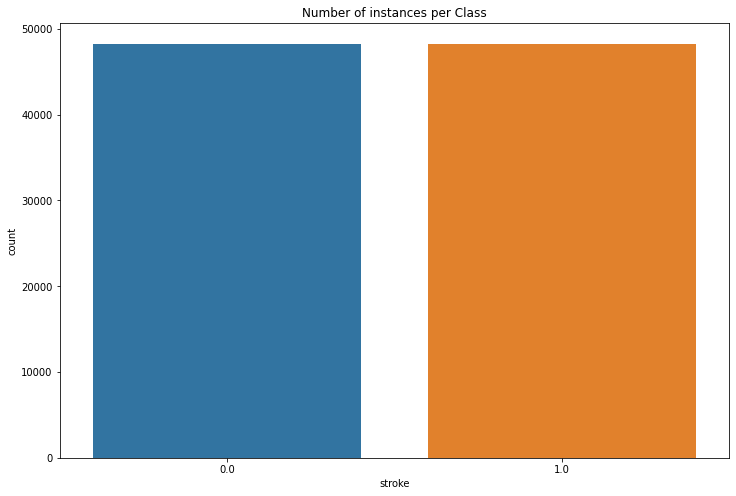

In [82]:
plt.title("Number of instances per Class")
sns.countplot(df_combine_sam.stroke);
plt.show()

In [83]:
df_combined_converted = spark.createDataFrame(df_combine_sam)
df_combined_converted_test = spark.createDataFrame(df_combine_test)

In [84]:
df_combined_converted.printSchema()

root
 |-- BMI: double (nullable = true)
 |-- age: double (nullable = true)
 |-- diabetes: double (nullable = true)
 |-- gender: double (nullable = true)
 |-- heart disease: double (nullable = true)
 |-- hypertension: double (nullable = true)
 |-- smoking history: double (nullable = true)
 |-- stroke: double (nullable = true)



In [85]:
from pyspark.ml.feature import  Binarizer, VectorAssembler, StringIndexer, VectorIndexer

In [86]:
featureColumns = ['gender', 'age', 'diabetes', 'hypertension', 'heart disease', 'smoking history', 'BMI']
assembler = VectorAssembler(inputCols = featureColumns, outputCol = 'features')
df_assembled = assembler.transform(df_combined_converted)
df_assembled_test = assembler.transform(df_combined_converted_test)

In [87]:
(trainingData, testData) = (df_assembled, df_assembled_test)
print("Distribution of Ones and Zeros in trainingData is: ", trainingData.groupBy('stroke').count().take(3))

Distribution of Ones and Zeros in trainingData is:  [Row(stroke=0.0, count=48285), Row(stroke=1.0, count=48285)]


In [88]:
trainingData.show(5)

+-----+----+--------+------+-------------+------------+---------------+------+--------------------+
|  BMI| age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|
+-----+----+--------+------+-------------+------------+---------------+------+--------------------+
|35.64|66.0|     1.0|   1.0|          0.0|         0.0|            2.0|   0.0|[1.0,66.0,1.0,0.0...|
| 30.0|69.0|     1.0|   0.0|          1.0|         1.0|            2.0|   0.0|[0.0,69.0,1.0,1.0...|
|33.89|61.0|     0.0|   1.0|          0.0|         0.0|            3.0|   0.0|[1.0,61.0,0.0,0.0...|
| 31.5|79.0|     0.0|   0.0|          0.0|         0.0|            3.0|   0.0|(7,[1,5,6],[79.0,...|
| 29.6|31.0|     0.0|   1.0|          0.0|         0.0|            1.0|   0.0|[1.0,31.0,0.0,0.0...|
+-----+----+--------+------+-------------+------------+---------------+------+--------------------+
only showing top 5 rows



In [89]:
testData.show(5)

+-----+---+--------+------+-------------+------------+---------------+------+--------------------+
|  BMI|age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+
|53.13| 29|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,2...|
|29.51| 41|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,4...|
|30.55| 71|       0|     0|            0|           0|              2|   0.0|(7,[1,5,6],[71.0,...|
| 29.7| 47|       0|     1|            0|           0|              3|   0.0|[1.0,47.0,0.0,0.0...|
|50.61| 51|       1|     0|            0|           1|              4|   0.0|[0.0,51.0,1.0,1.0...|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+
only showing top 5 rows



In [90]:
#random forest classifier
model_rf = RandomForestClassifier(labelCol="stroke", featuresCol="features", numTrees=30,maxDepth=4, impurity='gini', seed=60)
pipeline = Pipeline(stages=[model_rf])
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

In [91]:
predictions.select("BMI","age","diabetes","gender","heart disease","hypertension","smoking history","stroke","features","probability","prediction").show(5)

+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|  BMI|age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|         probability|prediction|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|53.13| 29|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,2...|[0.86059598222628...|       0.0|
|29.51| 41|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,4...|[0.86177734533943...|       0.0|
|30.55| 71|       0|     0|            0|           0|              2|   0.0|(7,[1,5,6],[71.0,...|[0.55266078055531...|       0.0|
| 29.7| 47|       0|     1|            0|           0|              3|   0.0|[1.0,47.0,0.0,0.0...|[0.77397192455751...|       0.0|
|50.61| 51|       1|     0|            0|           1|              4|   0.0|[0.0,5

In [92]:

y_true = predictions.select(['stroke']).collect()
y_pred = predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print("confusion metrix for random forest classfication")
print(classification_report(y_true, y_pred))

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='stroke')
RF=evaluator.evaluate(predictions)
print('Area Under ROC for Random  Forest classifier', RF)

confusion metrix for random forest classfication
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     12588
         1.0       0.06      0.76      0.11       217

    accuracy                           0.80     12805
   macro avg       0.53      0.78      0.50     12805
weighted avg       0.98      0.80      0.87     12805

Area Under ROC for Random  Forest classifier 0.7820356670605756


In [93]:
#Gradient Boosting Tree classifier
model_rf = GBTClassifier(labelCol="stroke", featuresCol="features", maxIter=10, subsamplingRate=0.8, maxDepth=3, lossType="logistic", stepSize=0.05,seed=60)
pipeline = Pipeline(stages=[model_rf])
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

In [94]:
predictions.select("BMI","age","diabetes","gender","heart disease","hypertension","smoking history","stroke","features","probability","prediction").show(5)

+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|  BMI|age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|         probability|prediction|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|53.13| 29|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,2...|[0.89103613888882...|       0.0|
|29.51| 41|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,4...|[0.89103613888882...|       0.0|
|30.55| 71|       0|     0|            0|           0|              2|   0.0|(7,[1,5,6],[71.0,...|[0.61376983192740...|       0.0|
| 29.7| 47|       0|     1|            0|           0|              3|   0.0|[1.0,47.0,0.0,0.0...|[0.76707170107721...|       0.0|
|50.61| 51|       1|     0|            0|           1|              4|   0.0|[0.0,5

In [95]:
y_true = predictions.select(['stroke']).collect()
y_pred = predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print("confusion metrix for Gradient Boosting Tree classifier")
print(classification_report(y_true, y_pred))

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='stroke')
GBT=evaluator.evaluate(predictions)
print(' Area Under ROC for Gradient Boosting Tree Classifier', evaluator.evaluate(predictions))

confusion metrix for Gradient Boosting Tree classifier
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     12588
         1.0       0.07      0.65      0.12       217

    accuracy                           0.84     12805
   macro avg       0.53      0.75      0.52     12805
weighted avg       0.98      0.84      0.90     12805

 Area Under ROC for Gradient Boosting Tree Classifier 0.7512038749507615


In [96]:
#Decision Tree  classifier
from pyspark.ml.classification import DecisionTreeClassifier
model_rf = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'stroke', maxDepth = 3)
pipeline = Pipeline(stages=[model_rf])
model = pipeline.fit(trainingData)
predictions = model.transform(testData)


In [97]:
predictions.select("BMI","age","diabetes","gender","heart disease","hypertension","smoking history","stroke","features","probability","prediction").show(5)

+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|  BMI|age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|         probability|prediction|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|53.13| 29|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,2...|[0.89015597188282...|       0.0|
|29.51| 41|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,4...|[0.89015597188282...|       0.0|
|30.55| 71|       0|     0|            0|           0|              2|   0.0|(7,[1,5,6],[71.0,...|[0.58516963973417...|       0.0|
| 29.7| 47|       0|     1|            0|           0|              3|   0.0|[1.0,47.0,0.0,0.0...|[0.89015597188282...|       0.0|
|50.61| 51|       1|     0|            0|           1|              4|   0.0|[0.0,5

In [98]:
y_true = predictions.select(['stroke']).collect()
y_pred = predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print("confusion metrix for Decision Tree  classifier")
print(classification_report(y_true, y_pred))

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='stroke')
DCT=evaluator.evaluate(predictions)
print(' Area Under ROC for Decision Tree classifier',DCT)

confusion metrix for Decision Tree  classifier
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     12588
         1.0       0.07      0.70      0.12       217

    accuracy                           0.83     12805
   macro avg       0.53      0.76      0.51     12805
weighted avg       0.98      0.83      0.89     12805

 Area Under ROC for Decision Tree classifier 0.7622097118314715


In [99]:
#logistic regression classifier
model_rf = LogisticRegression(featuresCol = 'features', labelCol = 'stroke', maxIter=10)
pipeline = Pipeline(stages=[model_rf])
model = pipeline.fit(trainingData)
predictions = model.transform(testData)


In [100]:
predictions.select("BMI","age","diabetes","gender","heart disease","hypertension","smoking history","stroke","features","probability","prediction").show(5)

+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|  BMI|age|diabetes|gender|heart disease|hypertension|smoking history|stroke|            features|         probability|prediction|
+-----+---+--------+------+-------------+------------+---------------+------+--------------------+--------------------+----------+
|53.13| 29|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,2...|[0.94243647740784...|       0.0|
|29.51| 41|       0|     1|            0|           0|              0|   0.0|(7,[0,1,6],[1.0,4...|[0.83897395080040...|       0.0|
|30.55| 71|       0|     0|            0|           0|              2|   0.0|(7,[1,5,6],[71.0,...|[0.29596651469667...|       1.0|
| 29.7| 47|       0|     1|            0|           0|              3|   0.0|[1.0,47.0,0.0,0.0...|[0.82766846492803...|       0.0|
|50.61| 51|       1|     0|            0|           1|              4|   0.0|[0.0,5

In [101]:
y_true = predictions.select(['stroke']).collect()
y_pred = predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print("confusion metrix for logistic regression classifier ")
print(classification_report(y_true, y_pred))

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='stroke')
LGR=evaluator.evaluate(predictions)
print(' Area Under ROC for Logistic regresion', LGR)


confusion metrix for logistic regression classifier 
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     12588
         1.0       0.05      0.85      0.10       217

    accuracy                           0.74     12805
   macro avg       0.52      0.79      0.47     12805
weighted avg       0.98      0.74      0.84     12805

 Area Under ROC for Logistic regresion 0.7928461968753797


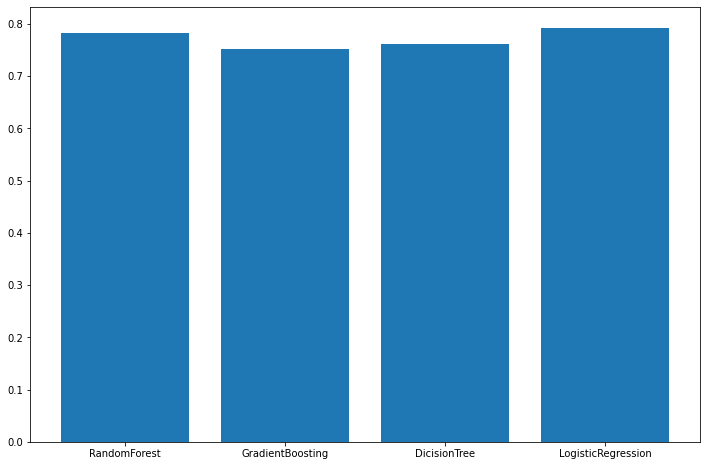

In [102]:
import matplotlib.pyplot as pl
import numpy as np

y=np.array([RF,GBT,DCT,LGR])  
x=np.array(["RandomForest",'GradientBoosting','DicisionTree','LogisticRegression'])

plt.bar(x,y)
plt.show()
